In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [8]:
csv_file = pd.read_csv('test.csv',header=None)
csv_file

,0,1,2,3,4,5
0,112.195729,190.90938,123.215,-176.629,-2.447,112.57
1,112.495729,190.60938,113.215,-176.629,-2.447,112.57
2,112.495729,190.30938,113.215,-176.629,-2.447,112.57
3,112.495729,190.00938,113.215,-176.629,-2.447,112.57
4,112.495729,189.70938,113.215,-176.629,-2.447,112.57
...,...,...,...,...,...,...
3577,112.195729,178.60938,113.215,-176.629,-2.447,112.57
3578,112.495729,178.90938,113.215,-176.629,-2.447,112.57
3579,112.495729,179.20938,113.215,-176.629,-2.447,112.57
3580,112.495729,179.50938,113.215,-176.629,-2.447,112.57


In [17]:
x,y,z = csv_file[0], csv_file[1], csv_file[2]
positions = np.column_stack((x,y,z))
print(positions.shape)

(3582, 3)


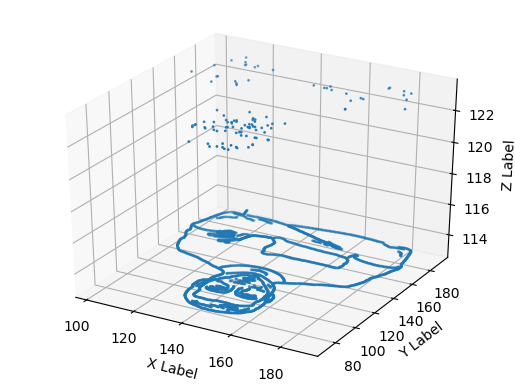

In [23]:

%matplotlib inline
# 3D 산점도 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1)

# 축 레이블 설정
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 플롯 표시
plt.show()

In [44]:


X_MIN_BOUND = -0.06
X_MAX_BOUND = 0.06
Y_MIN_BOUND = 0.25
Y_MAX_BOUND = 0.35
Z_MIN_BOUND = 0.051
Z_MAX_BOUND = 0.1

def transform_to_configuration_space(positions):
    """
    데이터를 configuration space로 변환:
    - x는 [-0.2, 0.2] 범위로 정규화
    - y는 [0.1, 0.2] 범위로 정규화
    - z는 [0.1, 0.2] 범위로 정규화
    - x:y 비율은 유지
    """
    transformed_positions = []

    # x와 y의 최소값과 최대값 계산
    x_min, x_max = positions[:, 0].min(), positions[:, 0].max()
    y_min, y_max = positions[:, 1].min(), positions[:, 1].max()

    print(x_min, x_max)
    print(y_min, y_max)
    # z의 최소값과 최대값 계산
    z_min, z_max = positions[:, 2].min(), positions[:, 2].max()

    for pos in positions:
        x, y, z = pos

        # x 정규화
        x_normalized = X_MIN_BOUND + (x - x_min) / (x_max - x_min) * (X_MAX_BOUND - (X_MIN_BOUND))

        # y 정규화
        y_normalized = Y_MIN_BOUND + (y - y_min) / (y_max - y_min) * (Y_MAX_BOUND - Y_MIN_BOUND)
        # scale_factor = y_normalized / y if y != 0 else 1.0
        # x_normalized *= scale_factor

        # z 정규화
        z_normalized = Z_MIN_BOUND + (z - z_min) / (z_max - z_min) * (Z_MAX_BOUND - Z_MIN_BOUND)

        # 결과 추가
        transformed_positions.append([x_normalized, y_normalized, z_normalized])

    return np.array(transformed_positions)

target_pts = transform_to_configuration_space(positions)

101.695728643216 188.395728643216
71.2093802345058 190.909380234506


In [45]:

%matplotlib tk
# 3D 산점도 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_pts[:,0], target_pts[:,1], target_pts[:,2], s=1)

# 축 레이블 설정
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 플롯 표시
plt.show()

In [47]:
target_pts[:,0].max(), target_pts[:,1].max(), target_pts[:,2].max(), target_pts[:,0].min(), target_pts[:,1].min(), target_pts[:,2].min()

(0.06, 0.35, 0.1, -0.06, 0.25, 0.051)

In [4]:
# 중심 좌표와 반지름 설정
center_x, center_y = 0, 0.3
radius = 0.03  # 원의 반지름

# 포인트 개수
num_points = 1000

# 각도 배열 생성 (0 ~ 2π)
angles = np.linspace(0, 2 * np.pi, num_points)

# 원 위의 포인트 생성
circle_points_x = center_x + radius * np.cos(angles)
circle_points_y = center_y + radius * np.sin(angles)
circle_points_z = np.ones(num_points) * 0.05
# to csv
circle_points = np.column_stack((circle_points_x, circle_points_y, circle_points_z))
pd.DataFrame(circle_points).to_csv('circle_points.csv', header=False, index=False)

In [69]:

X_MIN_BOUND = -0.06
X_MAX_BOUND = 0.06
Y_MIN_BOUND = 0.25
Y_MAX_BOUND = 0.37
Z_MIN_BOUND = 0.051
Z_MAX_BOUND = 0.1

def transform_to_configuration_space(positions):
    """
    데이터를 configuration space로 변환:
    - x는 [-0.2, 0.2] 범위로 정규화
    - y는 [0.1, 0.2] 범위로 정규화
    - z는 [0.1, 0.2] 범위로 정규화
    - x:y 비율은 유지
    """
    transformed_positions = []

    # x와 y의 최소값과 최대값 계산
    x_min, x_max = positions[:, 0].min(), positions[:, 0].max()
    y_min, y_max = positions[:, 1].min(), positions[:, 1].max()

    print(x_min, x_max)
    print(y_min, y_max)
    # z의 최소값과 최대값 계산
    z_min, z_max = positions[:, 2].min(), positions[:, 2].max()

    for pos in positions:
        x, y, z = pos

        # x 정규화
        x_normalized = X_MIN_BOUND + (x - x_min) / (x_max - x_min) * (X_MAX_BOUND - (X_MIN_BOUND))

        # y 정규화
        y_normalized = Y_MIN_BOUND + (y - y_min) / (y_max - y_min) * (Y_MAX_BOUND - Y_MIN_BOUND)
        # scale_factor = y_normalized / y if y != 0 else 1.0
        # x_normalized *= scale_factor

        # z 정규화
        z_normalized = z #Z_MIN_BOUND + (z - z_min) / (z_max - z_min) * (Z_MAX_BOUND - Z_MIN_BOUND)

        # 결과 추가
        transformed_positions.append([x_normalized, y_normalized, z_normalized])

    return np.array(transformed_positions)
csv_file_path = 'circle_points.csv'
pts = pd.read_csv(csv_file_path, header=None)
pts = pts.to_numpy()
# 퍼블리시 실행
transformed_pts = transform_to_configuration_space(pts)


-0.0299998516595233 0.03
0.2700000370851421 0.3299999629148579


In [70]:
x,y = transformed_pts[:,0], transformed_pts[:,1]

plt.scatter(x, y, s=1)
plt.grid()